In [156]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets

In [157]:
use_cuda = torch.cuda.is_available()

In [158]:
device = torch.device('cuda') if use_cuda else "cpu"

In [159]:
# separable = False
# while not separable:
#     samples = datasets.make_classification(n_samples=25000, n_features=2, 
#                                     n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
#     red = samples[0][samples[1] == 0]
#     blue = samples[0][samples[1] == 1]
#     separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
# plt.plot(red[:, 0], red[:, 1], 'r.')
# plt.plot(blue[:, 0], blue[:, 1], 'b.')
# plt.show()

In [160]:
# X_moons_train = torch.tensor(samples[0][0:20000], dtype = torch.float32)
# X_moons_valid = torch.tensor(samples[0][20000:], dtype = torch.float32)
# Y_moons_train = torch.tensor(samples[1][0:20000], dtype = torch.float32)
# Y_moons_valid = torch.tensor(samples[1][20000:], dtype = torch.float32)
# Y_moons_train = Y_moons_train.view(Y_moons_train.size()[0], 1)
# Y_moons_valid = Y_moons_valid.view(Y_moons_valid.size()[0], 1)

In [250]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32, 8)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(8, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.relu2(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [251]:
def train_epoch(model, opt, batch_size, criterion,X_data, Y_data):
    model.train()
    losses = []
    running_corrects = 0
    shuffled_idx = list(np.random.permutation(X_data.size()[0]))
    X_data_shuffled = [X_data[i] for i in shuffled_idx]
    Y_data_shuffled = [Y_data[i] for i in shuffled_idx]
    minibatch_idxs = np.array_split(shuffled_idx, len(shuffled_idx)/batch_size)
    for minibatch_ids in minibatch_idxs:
        x_batch = X_data[minibatch_ids]
        y_batch = Y_data[minibatch_ids]
        #print("batch size: ",len(x_batch), "actual size: ", len(minibatch_ids))
        x_batch = Variable(x_batch).to(device)
        y_batch = Variable(y_batch).to(device)
        opt.zero_grad()
        y_hat = net(x_batch)
        y_preds = (y_hat > 0.5).type(torch.float32)
        cumulative_corrects = float(torch.sum(y_preds == y_batch).item())
        running_corrects += cumulative_corrects
        #print("RC, SC, TS", running_corrects, cumulative_corrects, y_preds.size()[0])
        #print(running_corrects)
        loss = criterion(y_hat, y_batch)
        loss.backward()
        opt.step()        
        losses.append(loss.item())
    accuracy = running_corrects * 1.0 / len(shuffled_idx)
    print("training accuracy..", accuracy)
    return losses

In [252]:
def validation(model, batch_size, X_data, Y_data):
    model.eval()
    running_corrects = 0
    shuffled_idx = list(np.random.permutation(X_data.size()[0]))
    X_data_shuffled = [X_data[i] for i in shuffled_idx]
    Y_data_shuffled = [Y_data[i] for i in shuffled_idx]
    minibatch_idxs = np.array_split(shuffled_idx, len(shuffled_idx)/batch_size)
    for minibatch_ids in minibatch_idxs:
        x_batch = X_data[minibatch_ids]
        y_batch = Y_data[minibatch_ids]
        x_batch = Variable(x_batch).to(device)
        y_batch = Variable(y_batch).to(device)
        with torch.no_grad():
            outputs = model(x_batch)
        y_preds = (outputs > 0.5).type(torch.float32)
        cumulative_corrects = float(torch.sum(y_preds == y_batch).item())
        #print(cumulative_corrects, y_preds.size()[0])
        running_corrects += cumulative_corrects
    accuracy = running_corrects * 1.0 / len(shuffled_idx)
    print("validation accuracy..", accuracy)
    return

### CIrcular data

In [253]:
X, Y = datasets.make_circles(n_samples=25000, factor=.6, noise=.1)

In [254]:
X_train = torch.tensor(X[0:20000], dtype = torch.float32)
X_valid = torch.tensor(X[20000:], dtype = torch.float32)
Y_train = torch.tensor(Y[0:20000], dtype = torch.float32)
Y_valid = torch.tensor(Y[20000:], dtype = torch.float32)

Y_train = Y_train.view(Y_train.size()[0], 1)
Y_valid = Y_valid.view(Y_valid.size()[0], 1)
one_indices = np.where(Y==1)
zero_indices = np.where(Y==0)

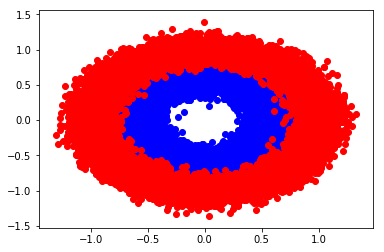

In [255]:
plt.scatter(X[one_indices, 0], X[one_indices, 1], color='b')
plt.scatter(X[zero_indices, 0], X[zero_indices, 1], color='r')

### random linear data

In [256]:
# X1 = torch.randn(6000, 50)
# X2 = torch.randn(6000, 50) + 1.5
# X = torch.cat([X1, X2], dim=0)
# Y1 = torch.zeros(6000, 1)
# Y2 = torch.ones(6000, 1)
# Y = torch.cat([Y1, Y2], dim=0)

In [257]:
# plt.scatter(X1[:, 0], X1[:, 1], color='b')
# plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [258]:
# X_train = torch.tensor(X[0:5000], dtype = torch.float32)
# X_valid = torch.tensor(X[5000:], dtype = torch.float32)
# Y_train = torch.tensor(Y[0:5000], dtype = torch.float32)
# Y_valid = torch.tensor(Y[5000:], dtype = torch.float32)

In [259]:
net = Net().to(device)
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
batch_size = 32
criterion = nn.BCELoss()

training accuracy.. 0.76625
validation accuracy.. 0.9592
training accuracy.. 0.9067
validation accuracy.. 0.9704
training accuracy.. 0.9333
validation accuracy.. 0.9678
training accuracy.. 0.9467
validation accuracy.. 0.9728
training accuracy.. 0.95535
validation accuracy.. 0.9706
training accuracy.. 0.95685
validation accuracy.. 0.9722
training accuracy.. 0.95825
validation accuracy.. 0.9758
training accuracy.. 0.96125
validation accuracy.. 0.9756
training accuracy.. 0.9623
validation accuracy.. 0.9752
training accuracy.. 0.9635
validation accuracy.. 0.976
training accuracy.. 0.96465
validation accuracy.. 0.9764
training accuracy.. 0.9642
validation accuracy.. 0.9756
training accuracy.. 0.96375
validation accuracy.. 0.976
training accuracy.. 0.9651
validation accuracy.. 0.9732
training accuracy.. 0.96645
validation accuracy.. 0.9748
training accuracy.. 0.96745
validation accuracy.. 0.9746
training accuracy.. 0.9651
validation accuracy.. 0.9702
training accuracy.. 0.9666
validation acc

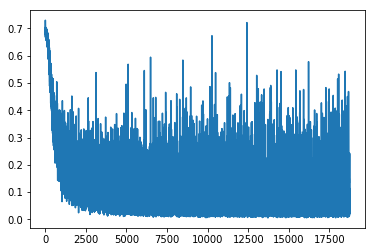

In [260]:
e_losses = []
num_epochs = 30
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, batch_size, criterion, X_train, Y_train)
    validation(net,batch_size, X_valid, Y_valid)
plt.plot(e_losses)